In [65]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
corpus = np.load("vectorized.npy")

In [67]:
vectorized = pd.DataFrame(corpus)

In [68]:
vectorized.shape

(298, 9053)

In [69]:
vocab = np.load("vocab.npy")
len(vocab)

9053

In [86]:
N_TOPICS = 4
svd = TruncatedSVD(n_components=N_TOPICS, n_iter=10).fit(vectorized)
lsa = make_pipeline(svd, Normalizer(copy=False)) 

['game' 'storm' 'airplan' 'cockpit' 'sport' 'amaz' 'hide' 'shot' 'caption'
 'photo']
[0.09301608 0.09710357 0.1159122  0.15243285 0.25172511 0.2806396
 0.32734842 0.33226757 0.36856889 0.56502196]

['aviat' 'sourc' 'drone' 'world' 'u' 'find' 'happen' 'chat' 'unfold'
 'messeng']
[0.00155501 0.00221385 0.00362387 0.0794687  0.08597113 0.13628146
 0.17451983 0.46004313 0.53664248 0.65701363]

['hold' 'compani' 'futur' 'charg' 'sourc' 'experiment' 'deliveri' 'aviat'
 'forefront' 'drone']
[0.11380398 0.1145762  0.13214002 0.17485971 0.22580862 0.25799253
 0.2913943  0.29288546 0.30720733 0.71373949]

['pilot' 'cloud' 'taken' 'flash' 'lightn' 'stun' 'roil' 'storm' 'airplan'
 'cockpit']
[0.14717685 0.15770256 0.17977383 0.19006669 0.2318102  0.25541592
 0.26501692 0.336512   0.40222866 0.53003385]



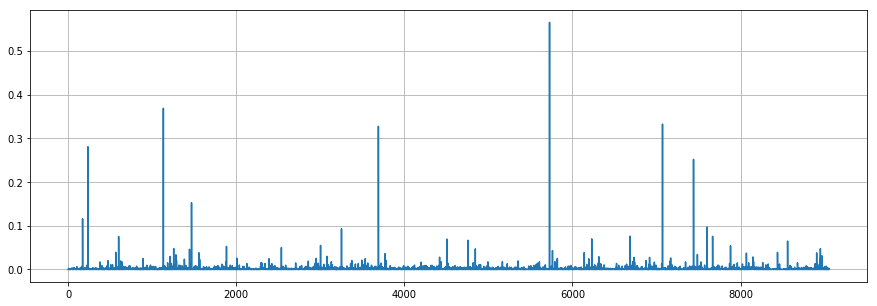

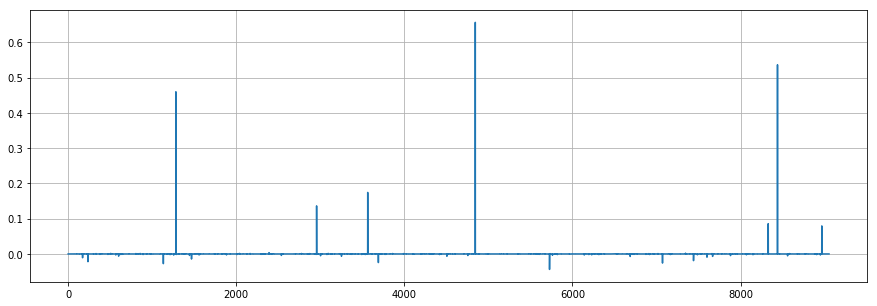

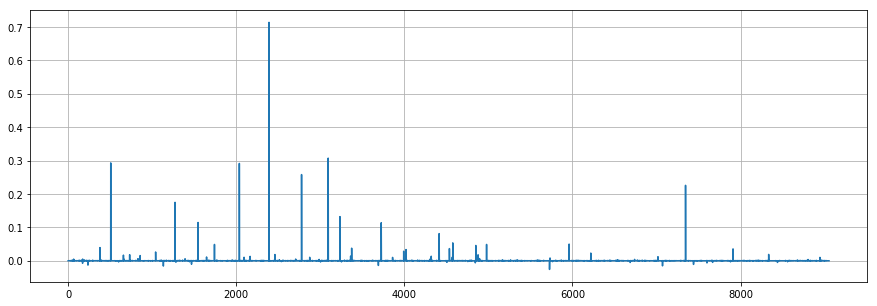

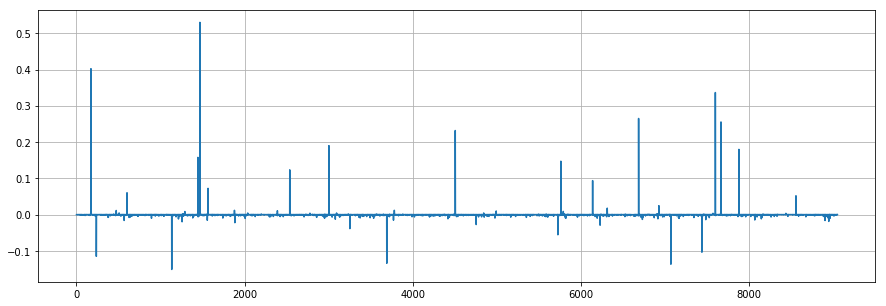

In [87]:
stub = [0] * N_TOPICS

for i in range(N_TOPICS):
    ind = np.argsort(svd.components_[i])[-10:]
    print(vocab[ind])
    print(np.sort(svd.components_[i])[-10:])
    print()
    
    tmp = stub.copy()
    tmp[i] = 1
    plt.figure(figsize=(15, 5))
    plt.plot(svd.components_[i])
    plt.grid(True)
plt.show()

In [88]:
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation

stemmed = np.load("stemmed.npy")
dictionary = corpora.Dictionary(stemmed)
X_bow = [dictionary.doc2bow(text) for text in stemmed]
lda_gensim = models.ldamodel.LdaModel(X_bow, num_topics=N_TOPICS, id2word=dictionary, iterations=50)

In [89]:
lda_gensim.print_topics()

[(0,
  '0.009*"said" + 0.009*"can" + 0.006*"just" + 0.006*"also" + 0.006*"get" + 0.005*"one" + 0.005*"year" + 0.004*"say" + 0.004*"day" + 0.004*"time"'),
 (1,
  '0.012*"said" + 0.010*"photo" + 0.007*"year" + 0.006*"hide" + 0.006*"caption" + 0.005*"one" + 0.005*"can" + 0.005*"peopl" + 0.005*"sport" + 0.004*"like"'),
 (2,
  '0.011*"said" + 0.009*"can" + 0.007*"one" + 0.007*"year" + 0.005*"say" + 0.005*"like" + 0.004*"time" + 0.004*"first" + 0.004*"peopl" + 0.004*"health"'),
 (3,
  '0.011*"said" + 0.009*"photo" + 0.006*"can" + 0.006*"say" + 0.005*"year" + 0.005*"one" + 0.005*"caption" + 0.005*"hide" + 0.005*"time" + 0.004*"new"')]

In [90]:
lda_sklearn = LatentDirichletAllocation(n_components=N_TOPICS, max_iter=30, batch_size=10, evaluate_every=1, verbose=1, 
                                        n_jobs=4, learning_method='batch').fit(vectorized)

iteration: 1 of max_iter: 30, perplexity: 204126.1474
iteration: 2 of max_iter: 30, perplexity: 180153.4670
iteration: 3 of max_iter: 30, perplexity: 147161.5228
iteration: 4 of max_iter: 30, perplexity: 133985.7971
iteration: 5 of max_iter: 30, perplexity: 131489.6005
iteration: 6 of max_iter: 30, perplexity: 131316.2797
iteration: 7 of max_iter: 30, perplexity: 131304.8700
iteration: 8 of max_iter: 30, perplexity: 131302.9032
iteration: 9 of max_iter: 30, perplexity: 131302.5195
iteration: 10 of max_iter: 30, perplexity: 131302.3668
iteration: 11 of max_iter: 30, perplexity: 131302.2726


In [91]:
stub = [0] * N_TOPICS

for i in range(N_TOPICS):
    ind = np.argsort(lda_sklearn.components_[i])[-10:]
    print(vocab[ind])
    print(np.sort(svd.components_[i])[-10:])
    print()

['child' 'studi' 'said' 'amaz' 'race' 'sport' 'shot' 'hide' 'caption'
 'photo']
[0.09301608 0.09710357 0.1159122  0.15243285 0.25172511 0.2806396
 0.32734842 0.33226757 0.36856889 0.56502196]

['confirm' 'prompt' 'declar' 'outbreak' 'measl' 'jay' 'gov' 'chat'
 'unfold' 'messeng']
[0.00155501 0.00221385 0.00362387 0.0794687  0.08597113 0.13628146
 0.17451983 0.46004313 0.53664248 0.65701363]

['digit' 'tast' 'boom' 'liter' 'gold' 'metal' 'precious' 'sourc' 'upscal'
 'bargain']
[0.11380398 0.1145762  0.13214002 0.17485971 0.22580862 0.25799253
 0.2913943  0.29288546 0.30720733 0.71373949]

['growth' 'rugbi' 'captain' 'seven' 'influenti' 'arguabl' 'speedster'
 'slum' 'cosmet' 'mogul']
[0.14717685 0.15770256 0.17977383 0.19006669 0.2318102  0.25541592
 0.26501692 0.336512   0.40222866 0.53003385]

